# Course Project for COMP 4151 and 6151

**Part 1 is due on Oct 7, 2021. Before Class**


The goal of the project is let you uncover interesting relationships from a given dataset.

The project consists of a sequence of weekly assignments and reports.

The dataset you will work on has information about colleges and universities.  

All of us have seen this data for the first time.  In other words, we do not know if any interesting relationships exist in this data.

To uncover interesting relationships, we need to:

1. Ask interesting questions to hypothesize about a relationship.
2. Model and validate the relationship.

In this course, we have learned how to model a relationship between a set of features X, and a target variable y.  Technically, this can be done easily with sklearn, after we select a model: 
```
    model.fit(X,y)
```

In in-class examples or assignments, we are often told what X and y should be.  Here, we are not told what X and y are, because we do not know what they are.  The goal of the project is to discover what they are.

Technically, once we hypothesize about a relationship between X and y, we can evaluate that relationship by **cross-validating the model**.

At this time, you should already know the technical requirements and steps to model relationships and evaluate those relationships.

**Expectations**

+ Come up with *interesting* questions.
+ Come up with *interesting* hypotheses.
+ Demonstrate your technical ability by properly *modeling* the relationships in your hypotheses.
+ Demonstrate your technical ability by properly *evaluating* your hypotheses.
+ Draw proper conclusion. Analyze your hypotheses and possibly revise and improve them.

If a relationship between X and y appears *interesting* to people, either a positive confirmation or a lack of confirmation (rebuttal or disconfirmation) is valuable.

### The dataset

In [32]:
import pandas
df = pandas.read_csv('datasets/college_data.csv')
import pandas
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [2]:
print('There are', len(df.columns), 'columns.')
print(df.columns)

There are 145 columns.
Index(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       ...
       'Percent of freshmen  receiving federal grant aid',
       'Percent of freshmen receiving Pell grants',
       'Percent of freshmen receiving other federal grant aid',
       'Percent of freshmen receiving state/local grant aid',
       'Percent of freshmen receiving institutional grant aid',
       'Percent of freshmen receiving student loan aid',
       'Percent of freshmen receiving federal student loans',
       'Percent of freshmen receiving other loan aid',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      dtype='object', length=145)


### An example of a hypothesis

Hypothesis: there is a relationship between the number of graduated BS's and the percent of admission.

To verify this hypothesis, we need 
1. Determine what X and y are.
2. Attempt to visualize the relationship to see if there is one. This is problematic if X is multidimensional.
3. Attempt to model and (cross)validate the relationship.
4. Draw your conclusions.  Possibly go back to step 1, or revise our hypothesis.

#### Determining features (X) and the target variable (y)

Figure out which columns are needed. There are many ways to do this.

In [3]:
[col for col in df.columns if 'award' in col]

["Associate's degrees awarded",
 "Bachelor's degrees awarded",
 "Master's degrees awarded",
 "Doctor's degrese - research/scholarship awarded",
 "Doctor's degrees - professional practice awarded",
 "Doctor's degrees - other awarded",
 'Certificates of less than 1-year awarded',
 'Certificates of 1 but less than 2-years awarded',
 'Certificates of 2 but less than 4-years awarded',
 'Postbaccalaureate certificates awarded',
 "Post-master's certificates awarded"]

In [4]:
[col for col in df.columns if 'admit' in col]

['Percent admitted - total']

In [5]:
my_data = df[['Percent admitted - total', "Bachelor's degrees awarded"]]
print('Data points:', len(my_data))
print(my_data.isna().sum())
print('After removing missing data:', len(my_data.dropna()))
print(my_data.head())

Data points: 1534
Percent admitted - total      158
Bachelor's degrees awarded      2
dtype: int64
After removing missing data: 1376
   Percent admitted - total  Bachelor's degrees awarded
0                      90.0                       604.0
1                      87.0                      2195.0
2                       NaN                        68.0
3                      81.0                      1099.0
4                      51.0                       600.0


In [6]:
print('Removing missing data.')
my_data = my_data.dropna()
print(my_data)

Removing missing data.
      Percent admitted - total  Bachelor's degrees awarded
0                         90.0                       604.0
1                         87.0                      2195.0
3                         81.0                      1099.0
4                         51.0                       600.0
5                         57.0                      5000.0
...                        ...                         ...
1516                      60.0                       148.0
1525                      44.0                       826.0
1529                      35.0                       556.0
1530                      71.0                        75.0
1532                      53.0                        20.0

[1376 rows x 2 columns]


#### Modeling and validating the relationship

This is a regression problem. [Skip explanation]

X is 1-dimensional. Let's visualize this relationship.

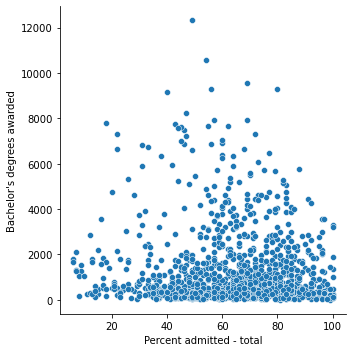

In [7]:
import seaborn
seaborn.relplot(data=my_data, x="Percent admitted - total", y="Bachelor's degrees awarded")

This doesn't look like there's a relationship.  Let's validate the model.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, cross_validate

X = my_data[['Percent admitted - total']]
y = my_data[["Bachelor's degrees awarded"]]
model = LinearRegression()
result = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=100))
result['test_score'].mean()

-0.004461100652685802

Based on averaged R2 scores of 100 shuffle and split cross validation, there does not seem to be a linear relationshiop between the number of BS degrees awarded and the percentage of admission.

Please see the HTML-formatted report.

In [9]:
df

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,451671,University of South Florida-Sarasota-Manatee,2013,34243-2049,Master's degree,Manatee County,-82.562951,27.391766,Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4422.0,NaN
1530,454184,The Kingâ€™s College,2013,10004,Bachelor's degree,New York County,-74.012348,40.706861,Interdenominational,Implied no,...,34.0,34.0,10.0,4.0,100.0,57.0,56.0,12.0,NaN,935.0
1531,454582,Ottawa University-Online,2013,66067,Master's degree,Franklin County,-95.263775,38.602692,American Baptist,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20863.0
1532,455770,Providence Christian College,2013,91104,Bachelor's degree,Los Angeles County,-118.118491,34.172750,Undenominational,Implied no,...,50.0,50.0,14.0,0.0,100.0,64.0,64.0,14.0,NaN,350.0


### Part 1 of the Project

**Deadline: Oct 7, 2021. Before Class**

In [10]:
from seaborn import relplot, catplot, displot
from uszipcode import SearchEngine

**Problem 1**
Plot the geographical locations of the colleges and universities.

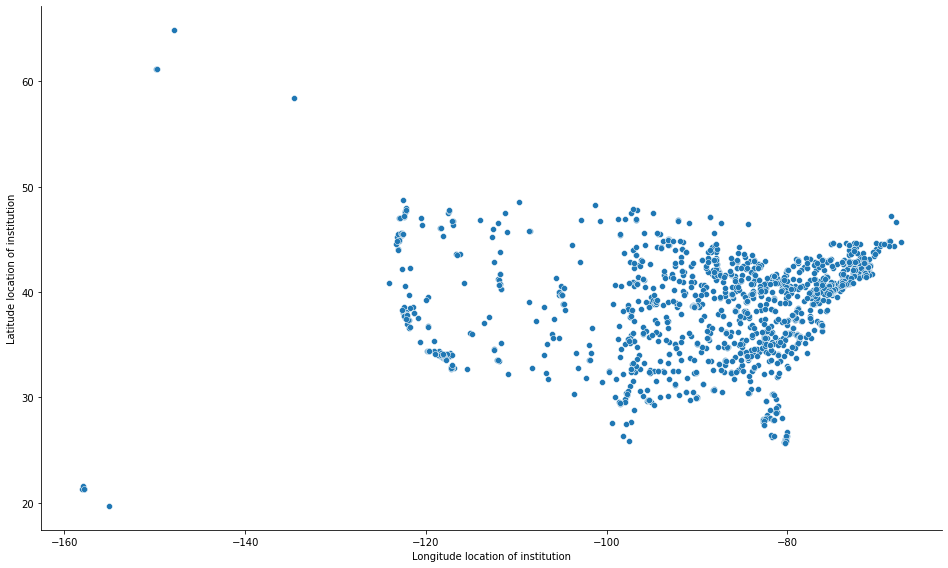

In [11]:
relplot(data=df, x='Longitude location of institution', y='Latitude location of institution', height=8, aspect=1.66)

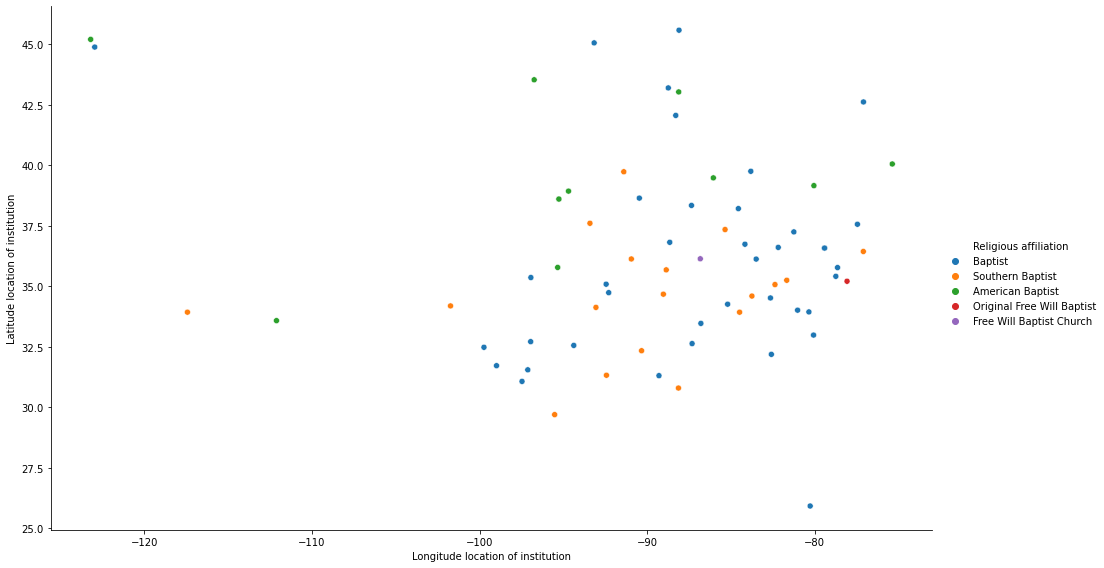

In [12]:
df1 = df[df['Religious affiliation'].notna()]
df1 = df1.loc[df1['Religious affiliation'].str.contains('baptist', case=False)]
relplot(data=df1, x='Longitude location of institution', y='Latitude location of institution', hue='Religious affiliation', height=8, aspect=1.66)

**Problem 2** Plot the numbers of colleges/universities in each state.

In [13]:
def add_state(row):
    search = SearchEngine()
    zipcode = search.by_zipcode(row[3][0:5])
    return zipcode.state

df['state'] = df.apply(add_state, axis=1)

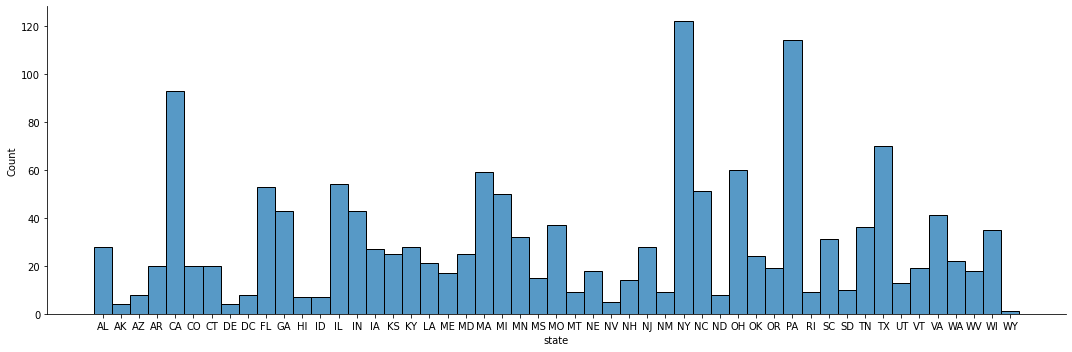

In [14]:
displot(data=df, x='state', aspect=3)

**Problem 3** Plot the distributions of tuitions.

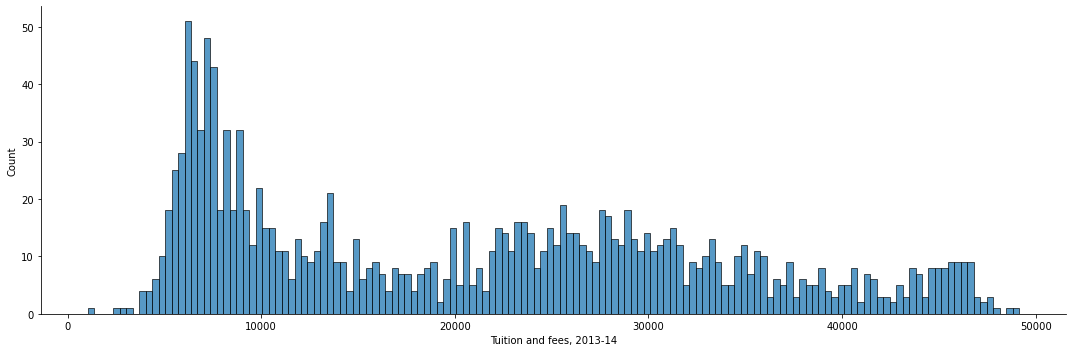

In [15]:
displot(data=df, x='Tuition and fees, 2013-14', aspect=3, kind='hist', bins=144)

**Problem 4** Divide the colleges and universities into 5 groups based on their tuitions.

The categories can be numeric, where 1 is the least expensive, and 5 is the most expensive.

In [16]:
def add_tuition_group(row):
    if row['Tuition and fees, 2013-14'] < 10000:
        return 1
    elif row['Tuition and fees, 2013-14'] < 20000:
        return 2
    elif row['Tuition and fees, 2013-14'] < 30000:
        return 3
    elif row['Tuition and fees, 2013-14'] < 40000:
        return 4
    else:
        return 5
dbt = df.dropna(subset=['Tuition and fees, 2013-14'])
dbt['tuition_group'] = dbt.apply(add_tuition_group, axis=1)

C:\Users\Dylan\AppData\Local\Temp/ipykernel_13908/1361232914.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbt['tuition_group'] = dbt.apply(add_tuition_group, axis=1)


In [17]:
dbt[['Name', 'Tuition and fees, 2013-14', 'tuition_group']]

,Name,"Tuition and fees, 2013-14",tuition_group
0,Alabama A & M University,7182.0,1
1,University of Alabama at Birmingham,7206.0,1
2,Amridge University,6870.0,1
3,University of Alabama in Huntsville,9192.0,1
4,Alabama State University,8720.0,1
...,...,...,...
1526,University of the West,9486.0,1
1529,University of South Florida-Sarasota-Manatee,5587.0,1
1530,The Kingâ€™s College,31300.0,4
1532,Providence Christian College,24222.0,3


**Problem 5** Compare the graduation rate (BS degree) of colleges across the 5 groups.

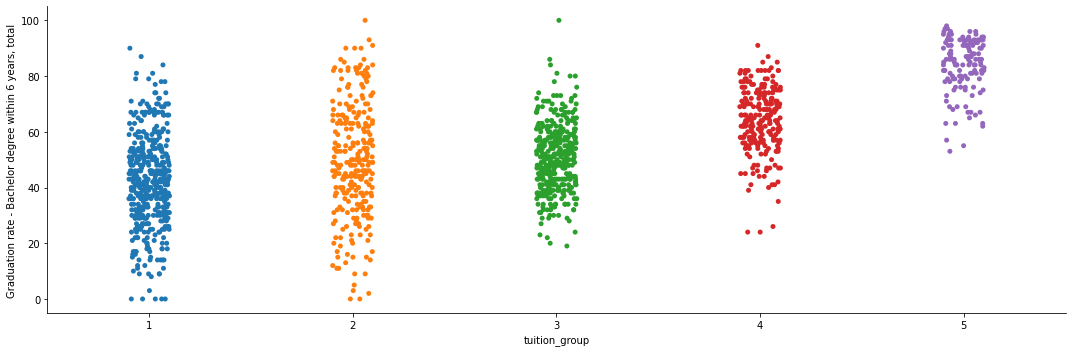

In [18]:
catplot(data=dbt, x='tuition_group', y='Graduation rate - Bachelor degree within 6 years, total', aspect=3, kind='strip')

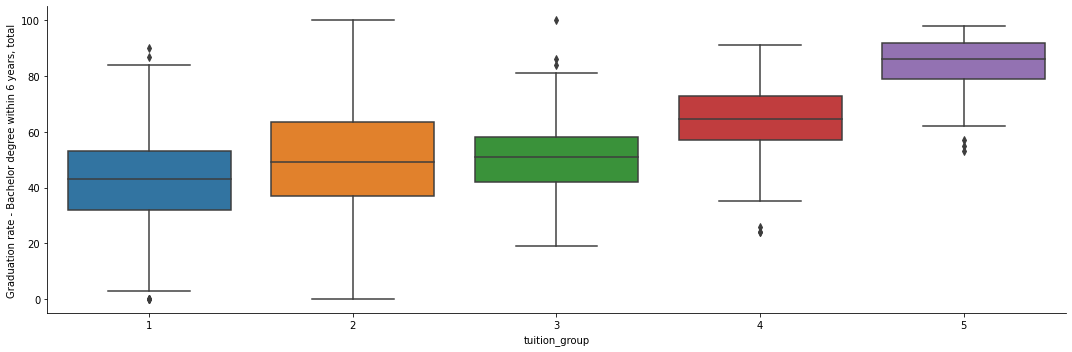

In [19]:
catplot(data=dbt, x='tuition_group', y='Graduation rate - Bachelor degree within 6 years, total', aspect=3, kind='box')

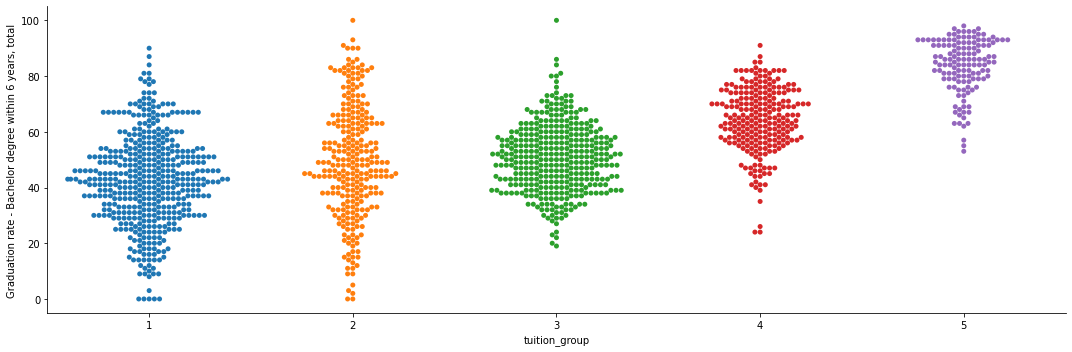

In [20]:
catplot(data=dbt, x='tuition_group', y='Graduation rate - Bachelor degree within 6 years, total', aspect=3, kind='swarm')

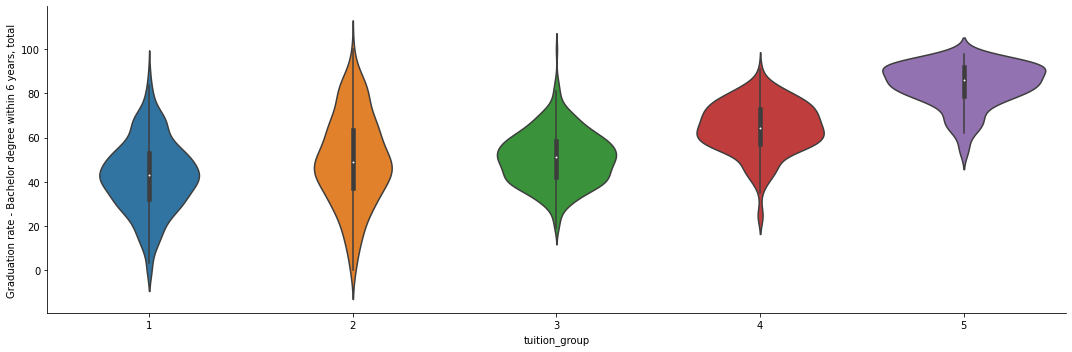

In [21]:
catplot(data=dbt, x='tuition_group', y='Graduation rate - Bachelor degree within 6 years, total', aspect=3, kind='violin')

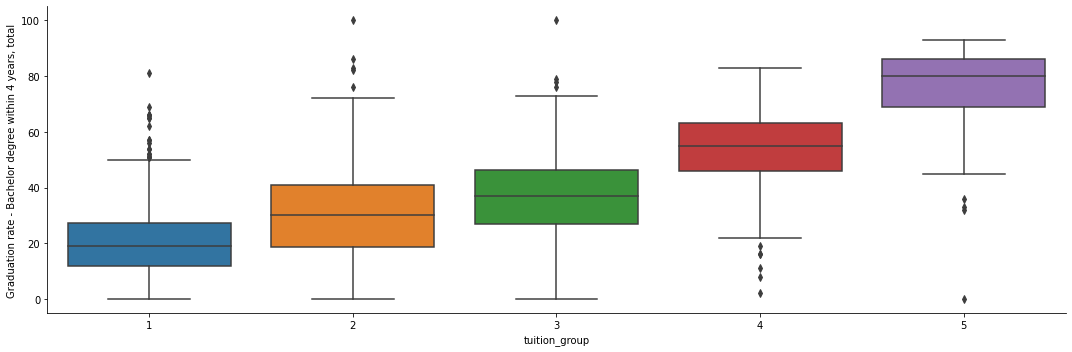

In [22]:
catplot(data=dbt, x='tuition_group', y='Graduation rate - Bachelor degree within 4 years, total', aspect=3, kind='box')

**Problem 6** Come up with 3 hypotheses about the 3 different relationships.

**Expectations**

+ Come up with *interesting* questions.
+ Come up with *interesting* hypotheses.
+ Demonstrate your technical ability by properly *modeling* the relationships in your hypotheses.
+ Demonstrate your technical ability by properly *evaluating* your hypotheses.
+ Draw proper conclusion. Analyze your hypotheses and possibly revise and improve them.

### Question 1: Is there a correlation between cost of tuition and the percentage of first-time undergraduates?

**Hypothesis: There will be a negative association between tuition and first-time undergraduates.**

In [23]:
my_data = df[['Tuition and fees, 2013-14', 'Percent of first-time undergraduates - in-state', 'Percent of first-time undergraduates - out-of-state']]
my_data = my_data.dropna()

In [24]:
def add_total_first_time_undergrads(row):
    total = row[1]+row[2]
    return total

my_data['total-first-time-undergrads'] = my_data.apply(add_total_first_time_undergrads, axis=1)

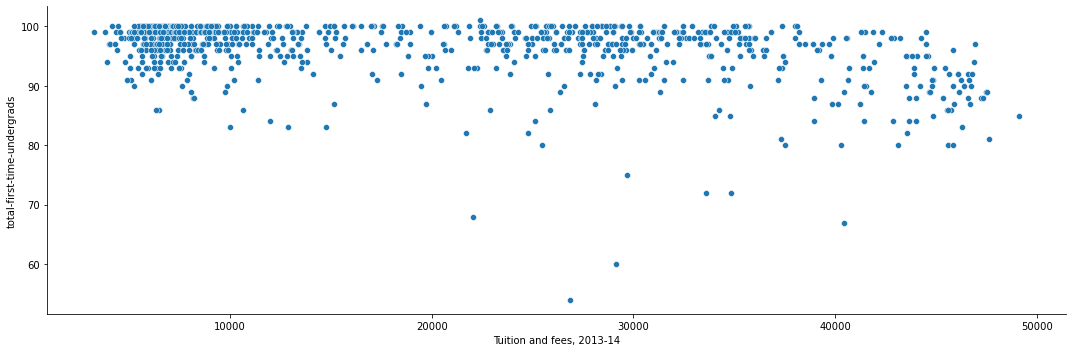

In [25]:
relplot(data=my_data, x='Tuition and fees, 2013-14', y='total-first-time-undergrads', aspect=3)

In [26]:
X = my_data[['Tuition and fees, 2013-14']]
y = my_data[["total-first-time-undergrads"]]
model = LinearRegression()
result = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=100))
print(result['test_score'].mean(), result['test_score'].std().round(2))

0.10921661876119099 0.1


In [27]:
model = Ridge()
result = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=100))
print(result['test_score'].mean(), result['test_score'].std().round(2))

0.12499784277929585 0.09


In [33]:
model = DecisionTreeClassifier()
X = my_data[['Tuition and fees, 2013-14']]
y = my_data[['total-first-time-undergrads']]
shuffler = ShuffleSplit(n_splits=100)
result = cross_validate(model, X, y, cv=shuffler)
result['test_score'].mean().round(2), result['test_score'].std().round(2)

(0.17, 0.04)

**Conclusion: There does not appear to be a statistically significant association between the overall percentage of first-time undergrads and the rate of tuition of a school.**

### Question 2: Is there an association between the cost of tuition and the percentage of applicants admitted?.

**Hypothesis: There is a negative relationship between tuition costs and applicants admitted.**

In [ ]:
my_data = df[['Tuition and fees, 2013-14', 'Percent admitted - total']]
my_data = my_data.dropna()

In [ ]:
def add_tuition_group(row):
    if row['Tuition and fees, 2013-14'] < 10000:
        return 1
    elif row['Tuition and fees, 2013-14'] < 20000:
        return 2
    elif row['Tuition and fees, 2013-14'] < 30000:
        return 3
    elif row['Tuition and fees, 2013-14'] < 40000:
        return 4
    else:
        return 5
df1 = df.dropna(subset=['Tuition and fees, 2013-14'])
my_data['tuition_group'] = df1.apply(add_tuition_group, axis=1)

In [ ]:
relplot(data=my_data, x='Tuition and fees, 2013-14', y='Percent admitted - total', aspect=3)

In [ ]:
catplot(data=my_data, x='tuition_group', y='Percent admitted - total', aspect=3, kind='box')

In [ ]:
X = my_data[['Tuition and fees, 2013-14']]
y = my_data[["Percent admitted - total"]]
model = LinearRegression()
model.fit(X,y)
result = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=100))
print(result['test_score'].mean(), result['test_score'].std().round(2))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
X = my_data[['Tuition and fees, 2013-14']]
y = my_data[["Percent admitted - total"]]
shuffler = ShuffleSplit(n_splits=100)
result = cross_validate(model, X, y, cv=shuffler)

In [ ]:
result['test_score'].mean().round(2), result['test_score'].std().round(2)

**Conclusion: While, the highest tuition schools *do* have a lower admission rate than the other tuition groups, there does not appear to be a negative linear association between the cost of tuition and the admission rates of these colleges/universities.**

### Question: Is there an association between the cost of tuition and the percentage of students receiving federal aid?

**Hypothesis: There is a positive association between the cost of tuition and the percentage of students who receive some type of federal aid.**

In [ ]:
my_data = df[['Tuition and fees, 2013-14', 'Percent of freshmen receiving any financial aid']]
my_data = my_data.dropna()

In [ ]:
relplot(data=my_data, x='Tuition and fees, 2013-14', y='Percent of freshmen receiving any financial aid')

In [ ]:
model = DecisionTreeClassifier()
X = my_data[['Tuition and fees, 2013-14']]
y = my_data[['Percent of freshmen receiving any financial aid']]
shuffler = ShuffleSplit(n_splits=100)
result = cross_validate(model, X, y, cv=shuffler)

In [ ]:
result['test_score'].mean().round(2), result['test_score'].std().round(2)

In [ ]:
X = my_data[['Tuition and fees, 2013-14']]
y = my_data[['Percent of freshmen receiving any financial aid']]
model = LinearRegression()
model.fit(X,y)
result = cross_validate(model, X, y, cv=ShuffleSplit(n_splits=100))
result['test_score'].mean()

**Conclusion: There does not appear to be linear association between the cost of tuition, and the percentage of students who receive financial aid. However, the decision tree classifier suggests that the association between these variables is non-linear such that students who attend schools with very low *and* very high tuition rates are less likely to receive federal aid.**